Root Mean Squared Error: $45929.44
R-squared Score: 0.7250


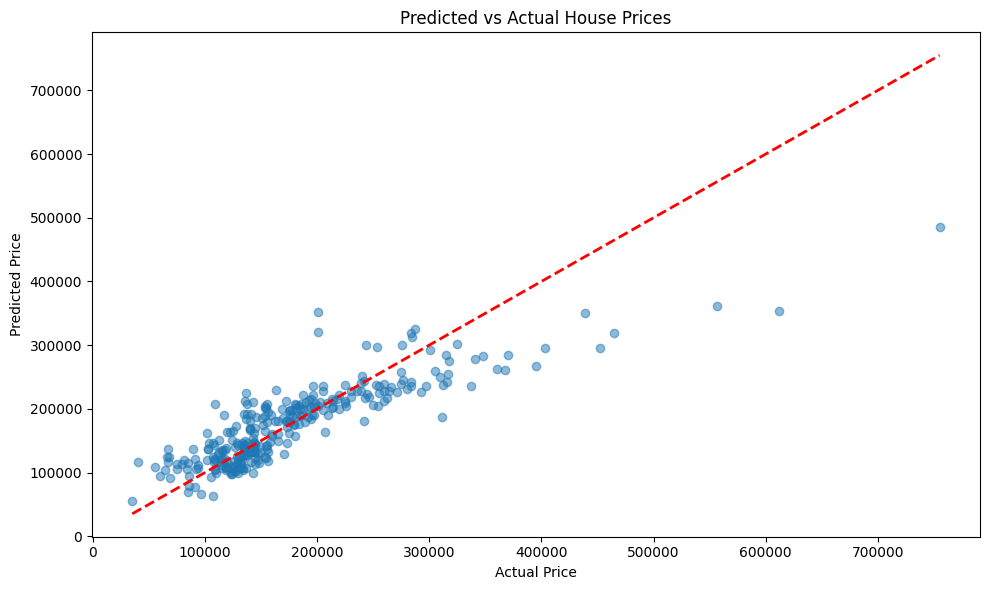

GrLivArea: $35414.02
BedroomAbvGr: $-14875.06
FullBath: $16560.44
HalfBath: $9531.85
TotalBsmtSF: $26137.16


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Select features for the model
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotalBsmtSF']

# Prepare the training data
X = train_data[features]
y = train_data['SalePrice']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val_scaled)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Plot predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual House Prices")
plt.tight_layout()
plt.show()

# Print feature coefficients
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: ${coef:.2f}")

# Prepare the test data
X_test = test_data[features]
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
test_predictions = model.predict(X_test_scaled)

# Create a submission dataframe
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)
print("Predictions saved to 'submission.csv'")

Root Mean Squared Error: $45929.44
R-squared Score: 0.7250


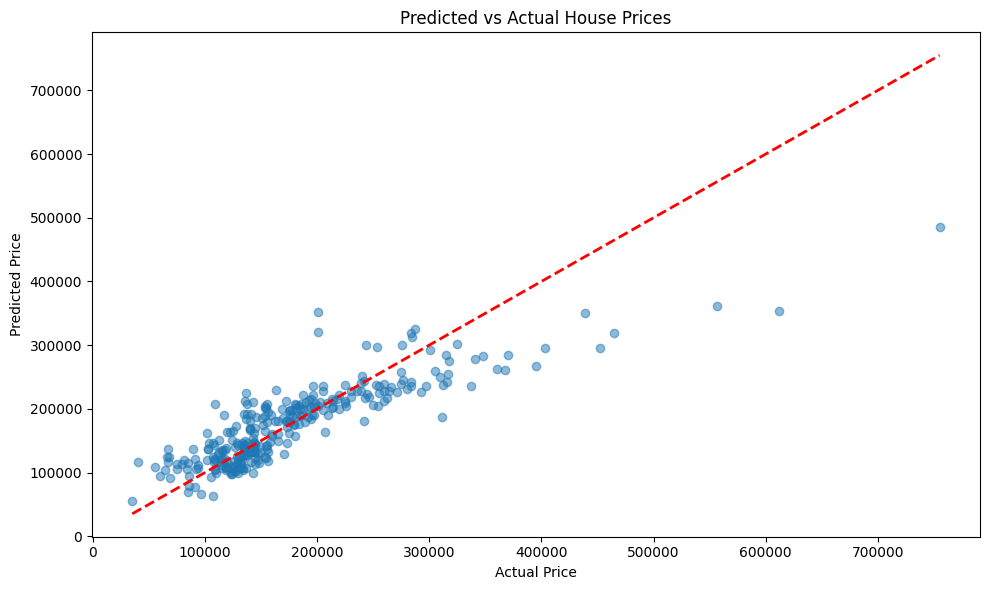

GrLivArea: $35414.02
BedroomAbvGr: $-14875.06
FullBath: $16560.44
HalfBath: $9531.85
TotalBsmtSF: $26137.16
Predictions saved to 'submission.csv'


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Select features for the model
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotalBsmtSF']

# Prepare the training data
X = train_data[features]
y = train_data['SalePrice']

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on training data and transform both training and test data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_test_imputed = pd.DataFrame(imputer.transform(test_data[features]), columns=features)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val_scaled)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"Root Mean Squared Error: ${rmse:.2f}")
print(f"R-squared Score: {r2:.4f}")

# Plot predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual House Prices")
plt.tight_layout()
plt.show()

# Print feature coefficients
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: ${coef:.2f}")

# Prepare the test data
X_test_scaled = scaler.transform(X_test_imputed)

# Make predictions on the test set
test_predictions = model.predict(X_test_scaled)

# Create a submission dataframe
submission = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)
print("Predictions saved to 'submission.csv'")